In [50]:
import numpy as np
import NR_a2_1_utils as utils
from matplotlib import pyplot as plt
from importlib import reload
from scipy import stats
import os
reload(utils)

<module 'NR_a2_1_utils' from 'C:\\Users\\Christiaan\\Desktop\\Numerical_Recipes\\a2\\NR_a2_1_utils.py'>

In [51]:
seed = 42
print('Original seed:',seed)

Original seed: 42


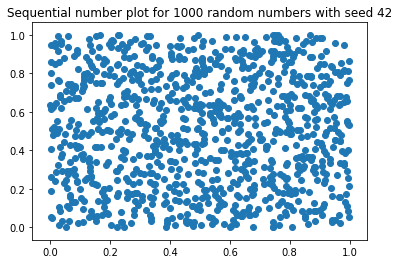

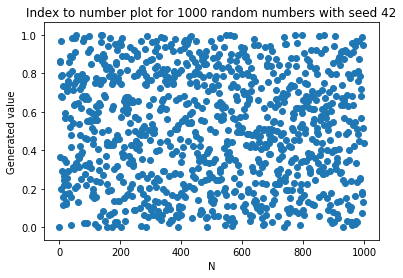

In [52]:
reload(utils)
rng = utils.rng(seed)
# Scatter plot
N = 1000 
rand = rng.rand_num(N)
plt.scatter(rand[:(len(rand)-1)],rand[1:])
plt.title('Sequential number plot for {} random numbers with seed {}'.format(1000,seed))
#plt.savefig('plots/1_a_1.png')
plt.show()
plt.scatter(np.arange(0,N,1),rand)
plt.title('Index to number plot for {} random numbers with seed {}'.format(1000,seed))
plt.xlabel('N')
plt.ylabel('Generated value')
plt.show()

Saving Histogram and scatter plot.


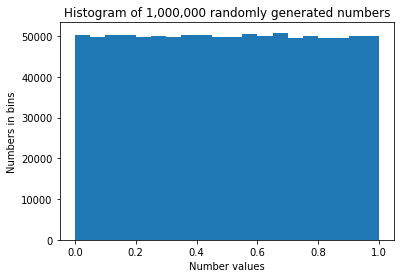

In [53]:
# Histogram
N = 1000000
rand = rng.rand_num(N)
plt.hist(rand,bins=20,range=(0,1))
plt.title('Histogram of 1,000,000 randomly generated numbers'.format(1000,seed))
plt.xlabel('Number values')
plt.ylabel('Numbers in bins')
plt.savefig('plots/1_b_2.png')
print('Saving Histogram and scatter plot.')

Saving Histogram.


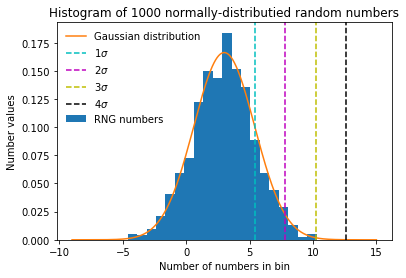

In [54]:
N = 1000
mu, sig = 3,2.4
rand = utils.box_muller(rng.rand_num(N),rng.rand_num(N),mu,sig)
gauss = lambda x,mu,sig : 1/(2*np.pi*sig**2)**0.5*np.exp(-0.5*(x-mu)**2/sig**2)
x = np.linspace(mu-(sig*5),mu+(sig*5),1000)
plt.hist(rand[0],bins=20,label='RNG numbers',density=1)
plt.plot(x,gauss(x,mu,sig),label='Gaussian distribution')
plt.title('Histogram of {} normally-distributied random numbers'.format(1000))
plt.xlabel('Number of numbers in bin')
plt.ylabel('Number values')
plt.axvline(x=mu+sig,label='$1\sigma$',color='c',linestyle='--')
plt.axvline(x=mu+2*sig,label='$2\sigma$',color='m',linestyle='--')
plt.axvline(x=mu+3*sig,label='$3\sigma$',color='y',linestyle='--')
plt.axvline(x=mu+4*sig,label='$4\sigma$',color='k',linestyle='--')
plt.legend(frameon=False)
plt.savefig('plots/1_b_2.png')
print('Saving Histogram.')

In [55]:
#reload(utils)
#mu,sig = 0,1
#rand = utils.box_muller(rng.rand_num(N),rng.rand_num(N),mu,sig)
#gauss = lambda x : 1/(2*np.pi*sig**2)**0.5*np.exp(-0.5*(x-mu)**2/sig**2)
#x,Fn,F,D,z = utils.KS_Kuip_test(rand[0],gauss,mu,sig)
#plt.plot(x,F)
#plt.plot(x,Fn)
#print(z)

In [56]:
reload(utils)
mu,sig = 0,1
rand = utils.box_muller(rng.rand_num(N),rng.rand_num(N),mu,sig)
gauss = lambda x : 1/(2*np.pi*sig**2)**0.5*np.exp(-0.5*(x-mu)**2/sig**2)
n = np.logspace(np.log10(10),np.log10(100000),dtype=int)
#print(len(n))
#print(n)
P = np.zeros(len(n))
P_s = np.zeros(len(n))
d = np.zeros(len(n))
d_s = np.zeros(len(n))
for i in range(len(n)):
    rand = utils.box_muller(rng.rand_num(n[i]),rng.rand_num(n[i]),mu,sig)
    #print(utils.KS_test(rand[0],gauss,mu,sig))
    d[i],P[i] = utils.KS_Kuip_test(rand[0],gauss,mu,sig)
    #z_s[i] = (n[i]**0.5+0.12+0.11*n[i]**(-0.5))*stats.kstest(rand[0],'norm')[0]
    d_s[i],P_s[i] = stats.kstest(rand[0],'norm')

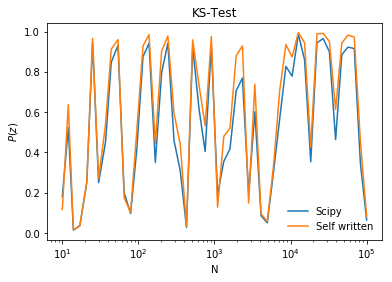

In [57]:
plt.plot(n,P_s,label='Scipy')
plt.plot(n,1-P,label='Self written')
plt.title('KS-Test')
plt.ylabel('$P(z)$')
plt.xlabel('N')
plt.xscale('log')
plt.legend(loc = 'lower right',frameon=False)

In [58]:
kuip_P = np.zeros(len(n))
kuip_P_s = np.zeros(len(n))
kuip_d = np.zeros(len(n))
kuip_d_s = np.zeros(len(n))
for i in range(len(n)):
    rand = utils.box_muller(rng.rand_num(n[i]),rng.rand_num(n[i]),mu,sig)
    kuip_d[i],kuip_P[i] = utils.KS_Kuip_test(rand[0],gauss,mu,sig,Kuip=True)
    kuip_d_s[i],kuip_P_s[i] = stats.kstest(rand[0],'norm')

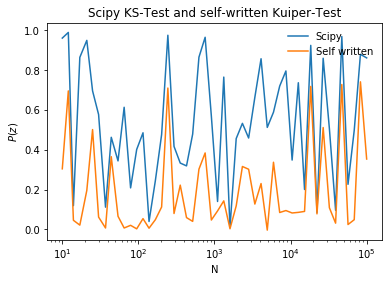

In [59]:
plt.plot(n,kuip_P_s,label='Scipy')
plt.plot(n,1-kuip_P,label='Self written')
plt.title('Scipy KS-Test and self-written Kuiper-Test')
plt.ylabel('$P(z)$')
plt.xlabel('N')
plt.xscale('log')
plt.legend(loc = 'upper right',frameon=False)


In [74]:
filename = 'randomnumbers.txt'
url = 'https://home.strw.leidenuniv.nl/~nobels/coursedata/'
if not os.path.isfile(filename):
    print(f'File not found, downloading {filename}')
    os.system('wget '+url+filename)

In [79]:
random_num = np.genfromtxt(filename,delimiter=' ',skip_footer=1)

[-0.33626446  0.24233713 -0.40154674 -0.71449137 -0.99676844  0.40989531
  0.14959383  0.07011189  0.08886294 -1.47271897]


In [108]:
print(len(random_num))

88428


In [109]:
n = np.logspace(np.log10(10),np.log10(len(random_num)),dtype=int)

kuip_P = np.zeros(len(n))
kuip_P_s = np.zeros(len(n))
kuip_d = np.zeros(len(n))
kuip_d_s = np.zeros(len(n))

for i in range(len(n)):
    #rand = utils.box_muller(rng.rand_num(n[i]),rng.rand_num(n[i]),mu,sig)
    rand = np.array(random_num[:n[i],0])
    kuip_d[i],kuip_P[i] = utils.KS_Kuip_test(rand,gauss,mu,sig,Kuip=True)
    kuip_d_s[i],kuip_P_s[i] = stats.kstest(rand,'norm')

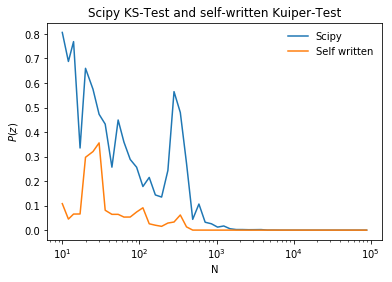

In [110]:
plt.plot(n,kuip_P_s,label='Scipy')
plt.plot(n,1-kuip_P,label='Self written')
plt.title('Scipy KS-Test and self-written Kuiper-Test')
plt.ylabel('$P(z)$')
plt.xlabel('N')
plt.xscale('log')
plt.legend(loc = 'upper right',frameon=False)

## 2. Making an initial density field